In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
#importing csv file
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Unnamed: 0,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High_BP,Low_BP
0,0,1,27,8,6.1,6,42,6,1,77,4200,0,126,83
1,1,1,28,1,6.2,6,60,8,2,75,10000,0,125,80
2,2,1,28,1,6.2,6,60,8,2,75,10000,0,125,80
3,3,1,28,8,5.9,4,30,8,3,85,3000,1,140,90
4,4,1,28,8,5.9,4,30,8,3,85,3000,1,140,90


In [3]:
df.shape

(374, 14)

In [4]:
# Drop unnecessary columns
df = df.drop(["Unnamed: 0"],axis=1)

In [5]:
# # Dividing dependent and independent variables

X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [6]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print("SMOTE {}".format(Counter(y)))

SMOTE Counter({0: 219, 1: 219, 2: 219})


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest_model=clf.fit(X_train, y_train)
y_pred=random_forest_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.90      0.92      0.91        38
           2       0.92      0.83      0.88        42

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132



In [11]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[50,  0,  2],
       [ 2, 35,  1],
       [ 3,  4, 35]], dtype=int64)

<AxesSubplot: >

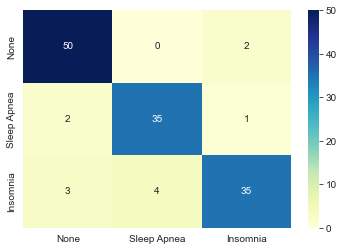

In [12]:
x_axis_labels = ["None","Sleep Apnea","Insomnia"]
y_axis_labels =  ["None","Sleep Apnea","Insomnia"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="YlGnBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
# pickle here